In [1]:
# This code is implemented all by Siyu Gao. This code plots the figure for real world datasets in the paper with the given file in this directory
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter 

In [2]:
vsset_1 = pd.read_csv('1vsset.csv')
WSVM = pd.read_csv('WSVM.csv')
COIL = pd.read_table('COIL_result.txt')
letter = pd.read_table('letter_result.txt')
pen = pd.read_table('pen_result_50.txt')

name_list = ['Sampling_method','Openness','N','RTSCV_f1','DSCV_f1','RTSCV_GM','DSCV_GM']
COIL.columns = name_list
pen.columns = name_list
letter.columns = name_list

In [5]:
def find_max(l,step,start):
    l_1 = []
    for i in range(len(l)):
        if (i)% step== start:
            l_1.append(l[i])
    return max(l_1)

In [4]:
pen_o = [9.25,18.35,32.06]
pen_DSCV = [find_max(pen.iloc[:,-1],3,i)for i in range(3)]
pen_RTSCV = [find_max(pen.iloc[:,-2],3,i)for i in range(3)]
pen_1vesst = vsset_1.iloc[0:3,-1]
pen_WSVM = WSVM.iloc[0:3,-1]

In [6]:
letter_o = [5.46,14.46,25.46]
letter_DSCV = [find_max(letter.iloc[:,-1],3,i)for i in range(3)]
letter_RTSCV = [find_max(letter.iloc[:,-2],3,i)for i in range(3)]
letter_1vesst = vsset_1.iloc[3:6,-1]
letter_WSVM = WSVM.iloc[3:6,-1]

In [7]:
coil_o = [9.25,18.35,27.99]
coil_DSCV = [find_max(COIL.iloc[:,-1],3,i)for i in range(3)]
coil_RTSCV = [find_max(COIL.iloc[:,-2],3,i)for i in range(3)]
coil_1vesst = vsset_1.iloc[6:9,-1]
coil_WSVM =  WSVM.iloc[6:9,-1]

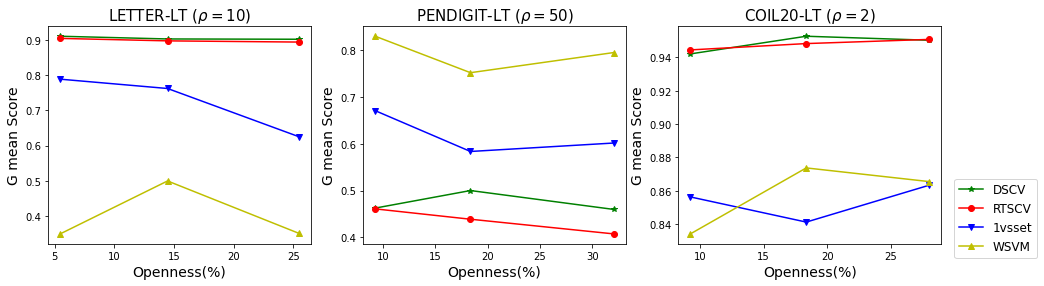

In [8]:
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))


ax[0].plot(letter_o,letter_DSCV,'g*-',label = 'DSCV')
ax[0].plot(letter_o,letter_RTSCV,'ro-',label = 'RTSCV')
ax[0].plot(letter_o,letter_1vesst,'bv-',label = '1vsset')
ax[0].plot(letter_o,letter_WSVM,'y^-',label = 'WSVM')
ax[0].set_title(r'LETTER-LT ($\rho = 10$)',fontsize = 15)
ax[0].tick_params(labelsize=10)
ax[0].set_xlabel('Openness(%)',fontsize = 14)
ax[0].set_ylabel('G mean Score',fontsize = 14)

ax[1].plot(pen_o,pen_DSCV,'g*-',label = 'DSCV')
ax[1].plot(pen_o,pen_RTSCV,'ro-',label = 'RTSCV')
ax[1].plot(pen_o,pen_1vesst,'bv-',label = '1vsset')
ax[1].plot(pen_o,pen_WSVM,'y^-',label = 'WSVM')
ax[1].set_title(r'PENDIGIT-LT ($\rho = 50$)',fontsize = 15)
ax[1].tick_params(labelsize=10)
ax[1].set_xlabel('Openness(%)',fontsize = 14)
ax[1].set_ylabel('G mean Score',fontsize = 14)

ax[2].plot(coil_o,coil_DSCV,'g*-',label = 'DSCV')
ax[2].plot(coil_o,coil_RTSCV,'ro-',label = 'RTSCV')
ax[2].plot(coil_o,coil_1vesst,'bv-',label = '1vsset')
ax[2].plot(coil_o,coil_WSVM,'y^-',label = 'WSVM')
ax[2].set_title(r'COIL20-LT ($\rho = 2$)',fontsize = 15)
ax[2].tick_params(labelsize=10)
ax[2].set_xlabel('Openness(%)',fontsize = 14)
ax[2].set_ylabel('G mean Score',fontsize = 14)
ax[2].legend(loc=2, bbox_to_anchor=(1.05,0.3),borderaxespad = 0.,prop={'size': 12})

fig.savefig('real_data_full',dpi = 100,bbox_inches = 'tight' )